In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
import os
import shutil

# Create the directory
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Copy the kaggle.json file to the .kaggle directory
shutil.copy('kaggle.json', os.path.expanduser('~/.kaggle/'))

# Set appropriate permissions for the kaggle.json file (not applicable in Windows but no harm to leave it)
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

In [4]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# # Unzip the downloaded dataset
# with ZipFile(r"C:\Users\Uyama\Downloads\CNN\plantvillage-dataset.zip", 'r') as zip_ref:
#     zip_ref.extractall()

In [3]:
print(os.listdir(r"C:\Users\Uyama\Downloads\CNN\plantvillage dataset"))


print(len(os.listdir(r"C:\Users\Uyama\Downloads\CNN\plantvillage dataset\segmented")))
print(os.listdir(r"C:\Users\Uyama\Downloads\CNN\plantvillage dataset\segmented")[:5])

print(len(os.listdir(r"C:\Users\Uyama\Downloads\CNN\plantvillage dataset\color")))
print(os.listdir(r"C:\Users\Uyama\Downloads\CNN\plantvillage dataset\color")[:5])

print(len(os.listdir(r"C:\Users\Uyama\Downloads\CNN\plantvillage dataset\grayscale")))
print(os.listdir(r"C:\Users\Uyama\Downloads\CNN\plantvillage dataset\grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [4]:
# Dataset Path
base_dir = r'C:\Users\Uyama\Downloads\CNN\plantvillage dataset\color'

(256, 256, 3)


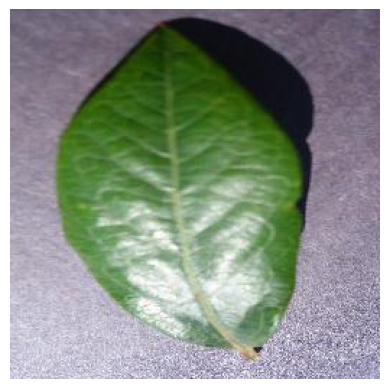

In [5]:
image_path = r"C:\Users\Uyama\Downloads\CNN\plantvillage dataset\color\Blueberry___healthy\0a818f22-929b-4ef8-bcdb-ac86e909ba26___RS_HL 5438.JPG"

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [6]:
image_path =  r"C:\Users\Uyama\Downloads\CNN\plantvillage dataset\color\Blueberry___healthy\0a818f22-929b-4ef8-bcdb-ac86e909ba26___RS_HL 5438.JPG"
# Read the image
img = mpimg.imread(image_path)

print(img)

[[[109 100 119]
  [108  99 118]
  [106  97 116]
  ...
  [ 95  81 104]
  [ 98  84 107]
  [104  90 113]]

 [[111 102 121]
  [110 101 120]
  [109 100 119]
  ...
  [ 96  82 105]
  [ 97  83 106]
  [102  88 111]]

 [[114 105 124]
  [114 105 124]
  [113 104 123]
  ...
  [ 96  82 105]
  [ 95  81 104]
  [ 98  84 107]]

 ...

 [[204 201 220]
  [205 202 221]
  [209 206 225]
  ...
  [148 145 174]
  [185 182 211]
  [178 175 204]]

 [[213 210 229]
  [190 187 206]
  [194 191 210]
  ...
  [168 165 194]
  [135 132 161]
  [159 156 185]]

 [[213 210 229]
  [196 193 212]
  [193 190 209]
  ...
  [164 161 190]
  [142 139 168]
  [193 190 219]]]


In [7]:
# Image Parameters
img_size = 224
batch_size = 32

### Test/Train Split

In [8]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [9]:
# Train Generator
train_gen = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [10]:
# Validation Generator
val_gen = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


### Convolutional Neural Network

In [11]:
model = models.Sequential([
    
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

C:\Users\Uyama\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [13]:
# Training the Model
history = model.fit(
    train_gen,
    epochs=5,  
    validation_data=val_gen,
)

Epoch 1/5


C:\Users\Uyama\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3196s 2s/step - accuracy: 0.6048 - loss: 1.8628 - val_accuracy: 0.8514 - val_loss: 0.4595
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3199s 2s/step - accuracy: 0.9173 - loss: 0.2594 - val_accuracy: 0.8733 - val_loss: 0.4212
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3025s 2s/step - accuracy: 0.9616 - loss: 0.1174 - val_accuracy: 0.8695 - val_loss: 0.4834
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3917s 3s/step - accuracy: 0.9766 - loss: 0.0728 - val_accuracy: 0.8685 - val_loss: 0.5398
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2889s 2s/step - accuracy: 0.9816 - loss: 0.0568 - val_accuracy: 0.8706 - val_loss: 0.5673


### Model Evaluation

In [14]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
340/340 ━━━━━━━━━━━━━━━━━━━━ 150s 440ms/step - accuracy: 0.8730 - loss: 0.5695
Validation Accuracy: 87.06%


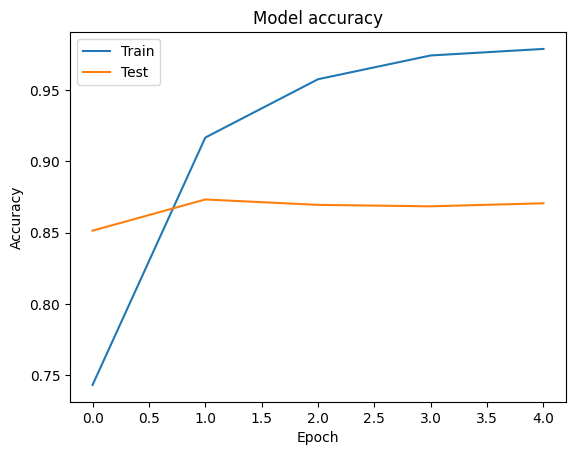

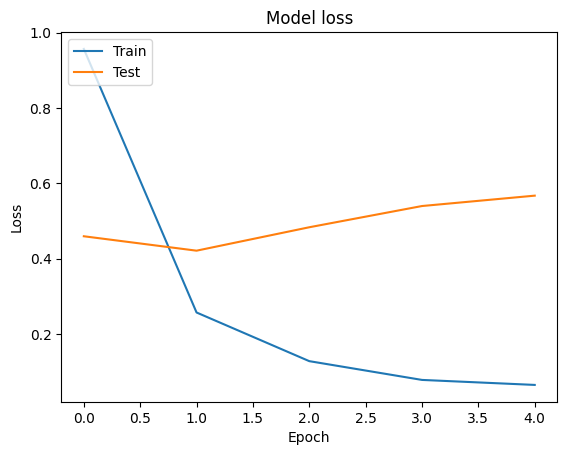

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt. plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Model Prediction

In [16]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [17]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_gen.class_indices.items()}

In [18]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [19]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [23]:
# Example Usage
# image_path = r'C:\Users\Uyama\Downloads\CNN\plantvillage dataset\color\Apple___healthy\00a6039c-e425-4f7d-81b1-d6b0e668517e___RS_HL 7669.JPG'
# image_path = r'C:\Users\Uyama\Downloads\CNN\plantvillage dataset\color\Grape___healthy\0ce12a10-c6ff-494e-a927-5ddc809c707a___Mt.N.V_HL 8945.JPG'
image_path = r'C:\Users\Uyama\Downloads\CNN\plantvillage dataset\color\Corn_(maize)___Common_rust_\RS_Rust 1568.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Class Name: Corn_(maize)___Common_rust_


In [24]:
model.save('plant_disease_prediction_model.h5')